# 고객 세분화 분석  

## 고객 데이터셋을 사용하여 비슷한 행동을 보이는 고객 그룹 식별  

* **데이터셋 탐색 및 전처리**
  * 결측치 처리
  * 스케일링
    * 표준화(Standardization)/정규화(Normalization)
* **클러스터링 기법 적용**
  * K-means
  * 계층적 군집화
  * DBSCAN 등의 알고리즘
* **최적의 클러스터 수 결정**
  * 엘보우 방법 또는 실루엣 점수를 사용, 최적의 클러스터 수 탐색
* **결과 시각화**
  * 클러스터링 결과를 2D 또는 3D로 시각화하여 고객 세분화 결과 분석
    * *시각화: matplotlib/seaborn을 사용, 클러스터를 색상으로 구분하여 시각화*
    * *2D플롯 사용, 각 클러스터를 다른 색으로 표현*
* **다양한 클러스터링 기법 비교**
  * DBSCAN 외에 Gaussian Mixture Model(GMM)와 같은 다른 클러스터링 기법을 적용, 성능 비교
* **고객 행동 예측 모델 구축**
  * 클러스터링 결과를 바탕으로 특정 클러스터에 속하는 고객의 행동을 예측하는 분류 모델 구축 (예 : 구매 가능성 예측 모델)
* **시계열 분석**
  * 고객의 행동 변화를 시간에 따라 분석, 특정 그룹의 트랜드를 시계열 데이터로 시각화

In [105]:
import pandas as pd

data = pd.read_csv("Mall_customers.csv")


print()
print(data.head())
print("\n\n데이터 정보\n")
print(data.info())
print("\n\n\n데이터 기본 통계\n")
print(data.describe())
print("\n\n\n결측확인\n")
print(data.isna().sum())
print()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None



데이터 기본 통계

       CustomerID         

### 데이터 전처리  
* LabelEncoding
* CustomerID Drop (가입순서에 따라 ID가 부여되었다고 가정, 시간데이터로 사용해 볼 예정)
* StandardScaler : PCA, K-Means알고리즘에 사용할 예정
### PCA 분석(PCA Analysis) 
* 2D시각화 및 차원 축소에 최적화하기 위해서 주성분 두개로 선택
* Explained Variance Ratio가 낮다면 추가 주성분 고려
### K-Means 클러스터링  
* Silhouette Score 계산 : 2-9까지 클러스터 개수 테스트
* Elbow Method를 활용, 클러스터의 최적 개수 시각화  
### 특성 중요도 분석 (Random Forest)  
* Spending Score의 중간값을 기준으로 가상 타깃(Pseudo Target) 생성(실제 타깃 **XXXXXX** 신뢰성 고려 필요. Spending Score의 사분위수로 비교 예정)
### 상관 분석  



In [106]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

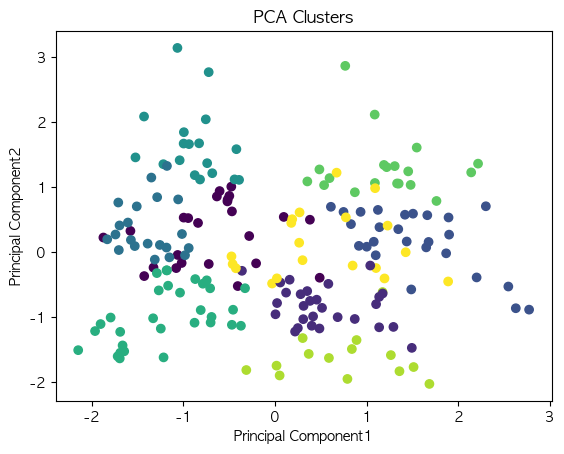

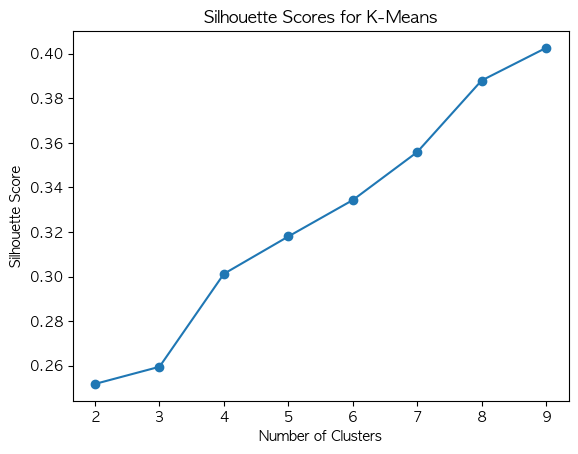

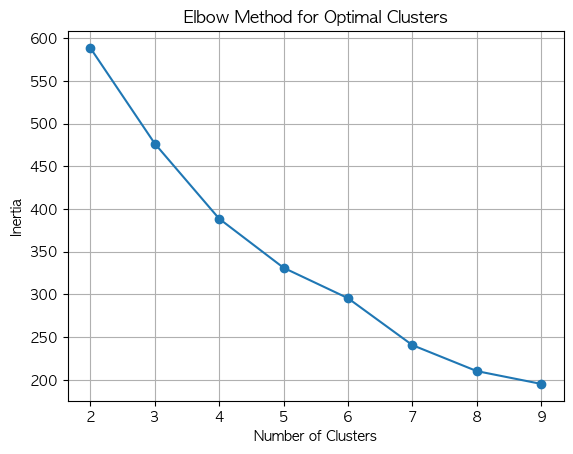

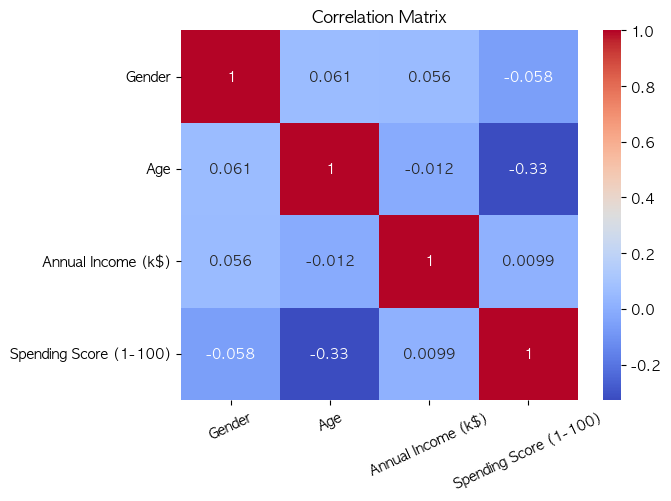


PCA Explained Variance Ratio:
   Principal Component  Explained Variance Ratio
0                    1                  0.336900
1                    2                  0.262306

Silhouette Scores:
   Number of Clusters  Silhouette Score
0                   2          0.251815
1                   3          0.259513
2                   4          0.301232
3                   5          0.317994
4                   6          0.334321
5                   7          0.355860
6                   8          0.387993
7                   9          0.402632

Elbow Method Results:
   Number of Clusters     Inertia
0                   2  588.802677
1                   3  476.787554
2                   4  388.765434
3                   5  331.264999
4                   6  295.620455
5                   7  240.650147
6                   8  210.234436
7                   9  195.218908

Random Forest Feature Importances:
              Feature  Importance
0              Gender    0.021693
1        

In [107]:
#데이터 전처리 - LabelEncoder사용
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

#Drop CustomerID
processed_data = data.drop(columns=['CustomerID'])

#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

#PCA Analysis
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

#K-Means Clustering - Silhouette Score, Elbow Method
silhouette_scores = []
for n_clusters in range(2, 10):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


#Feature Importance (Random Forest)
X = processed_data.drop(columns=['Spending Score (1-100)'])
y = processed_data['Spending Score (1-100)'] > processed_data['Spending Score (1-100)'].median()
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)
feature_importances = rf.feature_importances_

#Correlation Analysis
correlation_matrix = processed_data.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]
correlation_pairs = correlation_pairs.reset_index()
correlation_pairs[['level_0', 'level_1']] = pd.DataFrame(
    correlation_pairs[['level_0', 'level_1']].apply(sorted, axis=1).tolist(),
    index=correlation_pairs.index
)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['level_0', 'level_1'])
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_correlations = correlation_pairs.sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False)


#시각화

#PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('PCA Clusters')
plt.xlabel('Principal Component1')
plt.ylabel('Principal Component2')
plt.show()

#Silhouette Score
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#Elbow Method
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#Correlation Matrix Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=25)
plt.yticks(rotation=0) 
plt.title('Correlation Matrix')
plt.show()

#결과 요약
summary_results = {
    "PCA Explained Variance Ratio": explained_variance_ratio,
    "Silhouette Scores": pd.DataFrame({
        "Number of Clusters": range(2, 10),
        "Silhouette Score": silhouette_scores
    }),
    "Random Forest Feature Importances": pd.DataFrame({
        "Feature": X.columns,
        "Importance": feature_importances
    }),
    "Elbow Method": pd.DataFrame({
        "Number of Clusters": range(2, 10),
        "Inertia": inertia
    }),
    "Top Correlations": sorted_correlations.head(3)
}

# PCA 결과 요약 출력
print("\nPCA Explained Variance Ratio:")
print(pd.DataFrame({"Principal Component": [1, 2], "Explained Variance Ratio": explained_variance_ratio}))

# Silhouette Scores 요약 출력
print("\nSilhouette Scores:")
print(summary_results["Silhouette Scores"])

# Elbow Method 요약 출력
print("\nElbow Method Results:")
print(summary_results["Elbow Method"])

# Random Forest Feature Importances 출력
print("\nRandom Forest Feature Importances:")
print(summary_results["Random Forest Feature Importances"])

# 상관관계 요약 출력
print("\nTop Correlations:")
print(summary_results["Top Correlations"])
print()

### PCA (Principal Component Analysis)
#### 현재 누적 설명 분산 비율  
* PC1: 33.69%
* PC2: 26.23%
##### **총 59.92%의 변동성을 설명**  
* PC1과 PC2가 데이터의 분산을 60% 정도 설명하므로, 2개의 주성분만으로 데이터의 상당한 특성을 유지할 수 있다고 봄
* 그러나 60%는 설명력으로 약간 부족할 수 있어 주성분 추가 실험 예정

### Silhouette Scores  
* k=9에서 Silhouette Score가 가장 높음 (0.402632)
* 클러스터의 수를 9로 설정하는 것이 최적의 결과를 낼 가능성이 높으나 클러스터의 개수가 많아 해석 가능성이 낮아짐
* Elbow Method와 함께 고려해야할 듯	

### Elbow Method  
#### 최적 클러스터 수  
* 관성(Inertia)이 급격히 줄어드는 지점은 k=4~6, 이후 k=7부터 관성 감소가 완만해지는 경향
* 실루엣 점수와 함께 고려했을 때, 클러스터의 수를 4~6으로 설정하는 것이 적절해 보임
* 4, 5, 6... !싫험ㄱ

### Random Forest Feature Importance  
#### 가장 중요한 특성
- **Age: 56.11% 중요도**
- **Annual Income (k$): 41.72% 중요도**
- **Gender: 2.17%로 영향 미미**
- 나이와 소득이 주요 요인이며, 성별은 거의 영향을 미치지 않는다고 보여짐
- Gender 특성을 제거하거지는 않을것이나 분석의 초점을 크게 두지는 않을 예정

### 상관관계 (Top Correlations)
#### 주요 상관관계  
- **Age ↔ Spending Score: -0.327227 (약한 음의 상관관계)**  
나이가 많아질수록 소비 점수가 낮아지는 경향
<br>

- **Gender ↔ Age: 0.060867 (거의 상관 없음)**  
성별과 나이는 연관이 거의 없음
<br>  

- **Gender ↔ Spending Score: -0.058109 (거의 상관 없음)**  
성별과 소비 점수도 연관이 거의 없음

<br>  

**나이와 소비 점수 간의 약한 음의 관계에 집중**해서 분석, 해석


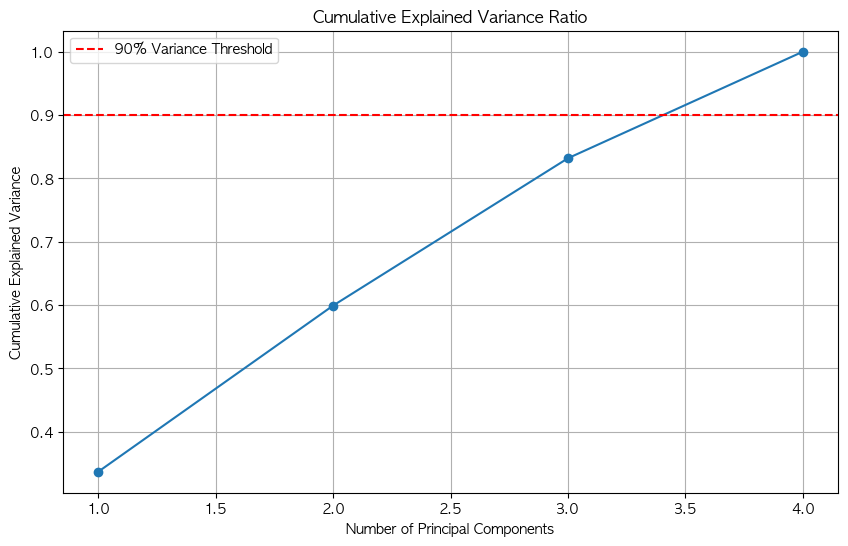

In [96]:
# 누적 설명 분산 비율 시각화
pca_full = PCA()
pca_full.fit(scaled_data)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

### 90% Variance Threshold를 기준으로 보면, 3개 이상의 주성분을 사용할 경우 데이터의 분산을 적절히 설명할 수 있는 것으로 보임  

## PCA  
차원을 줄일 때 3개의 주성분을 사용  
## K-Means 클러스터링  
최적 클러스터 수는 k=4...5? 6.. 그 어딘가로 설정
## Random Forest Feature Importance
주요 분석 초점은 Age와 Annual Income (k$)
## 상관관계
나이와 소비 점수 간의 관계에 대해서 추가 분석 가능하다면 ㄱ

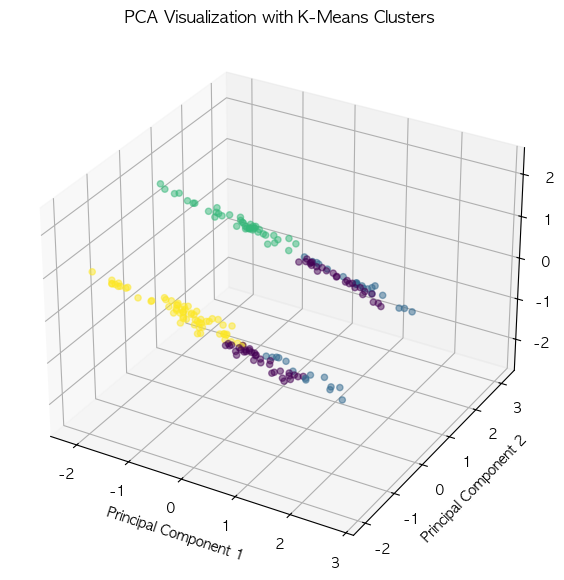

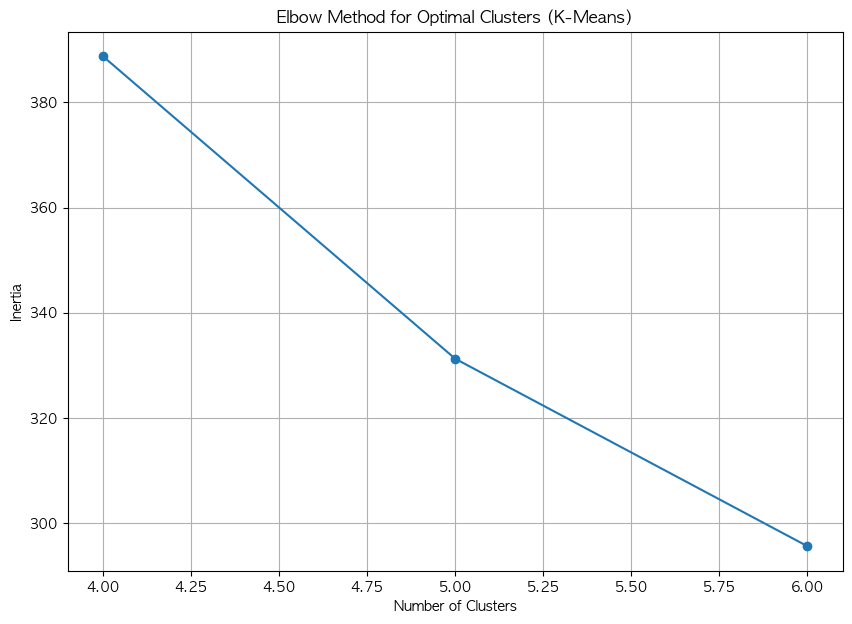

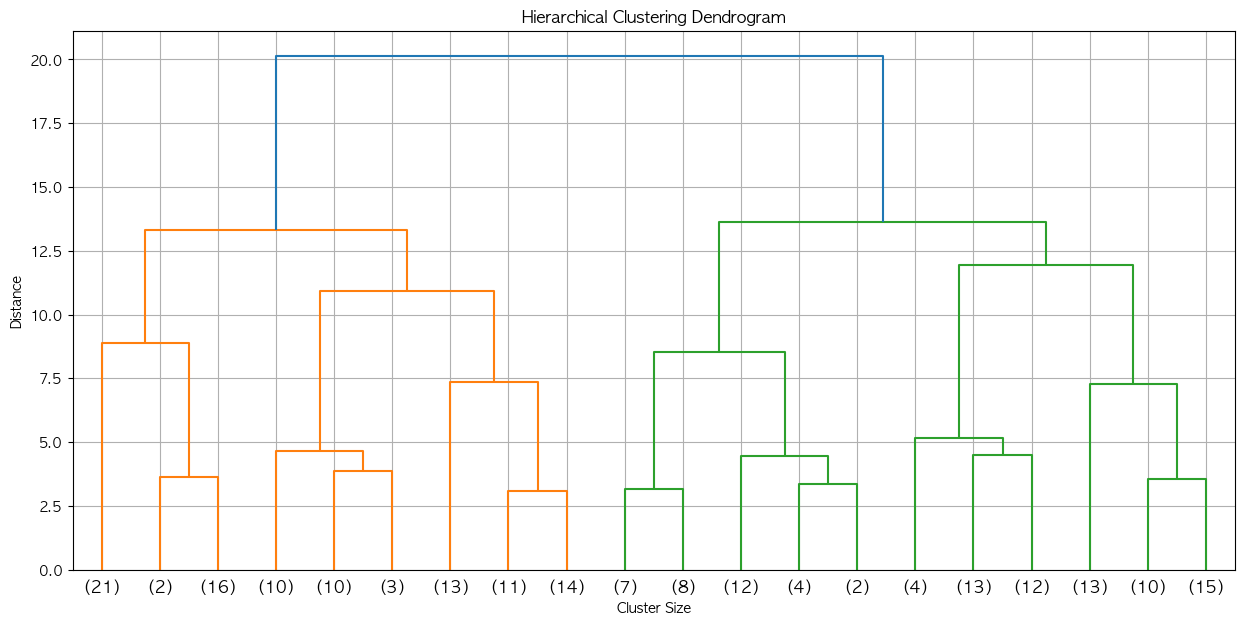

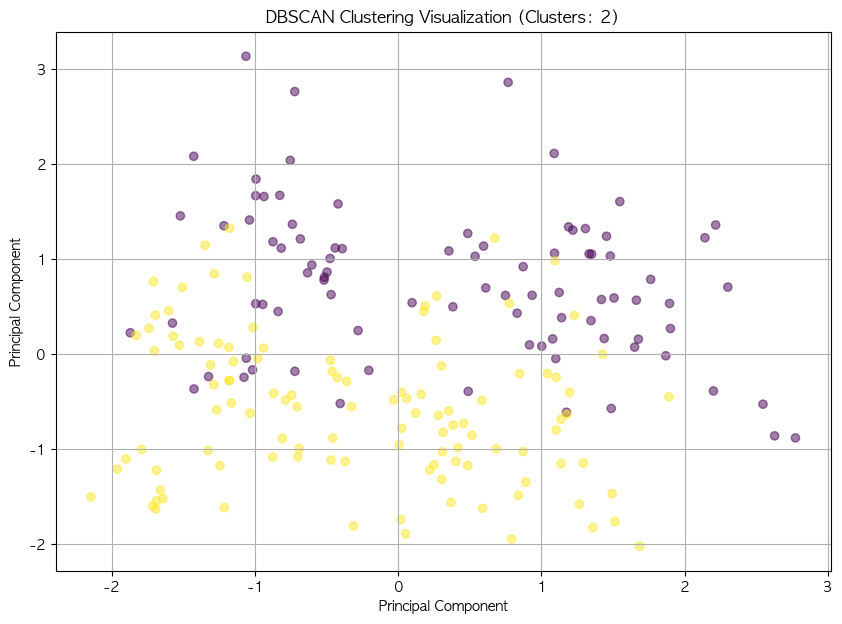

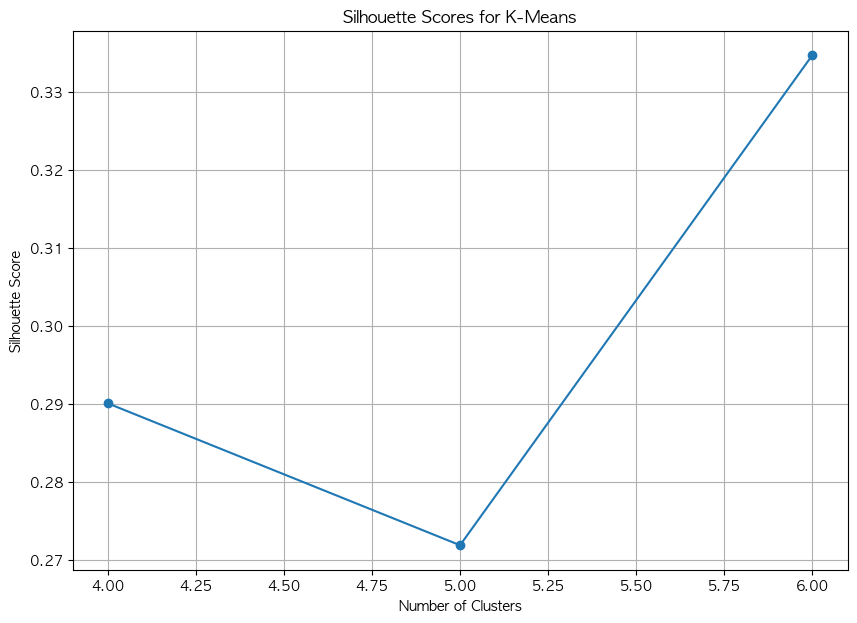

{'K-Means': 4, 'DBSCAN Clusters': 2}

In [121]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# PCA with 3 components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# PCA Visualization in 3D
from mpl_toolkits.mplot3d import Axes3D

# K-Means 클러스터링 결과로 색상 표시
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_data)
ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax.set_title('PCA Visualization with K-Means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

#K-Means with Elbow Method
inertia = []
for n_clusters in range(4, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

optimal_k = range(4, 7)[inertia.index(min(inertia))]

plt.figure(figsize=(10, 7))
plt.plot(range(4, 7), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#Hierarchical Clustering Dendrogram
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.grid()
plt.show()

#DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
n_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering Visualization (Clusters: {n_dbscan_clusters})')
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.grid()
plt.show()

#Silhouette Scores for Optimal Clusters
silhouette_scores = []
for n_clusters in range(4, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.figure(figsize=(10, 7))
plt.plot(range(4, 7), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

#요약
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2 
optimal_clusters = {
    'K-Means': optimal_k,
    'DBSCAN Clusters': n_dbscan_clusters
}
optimal_clusters

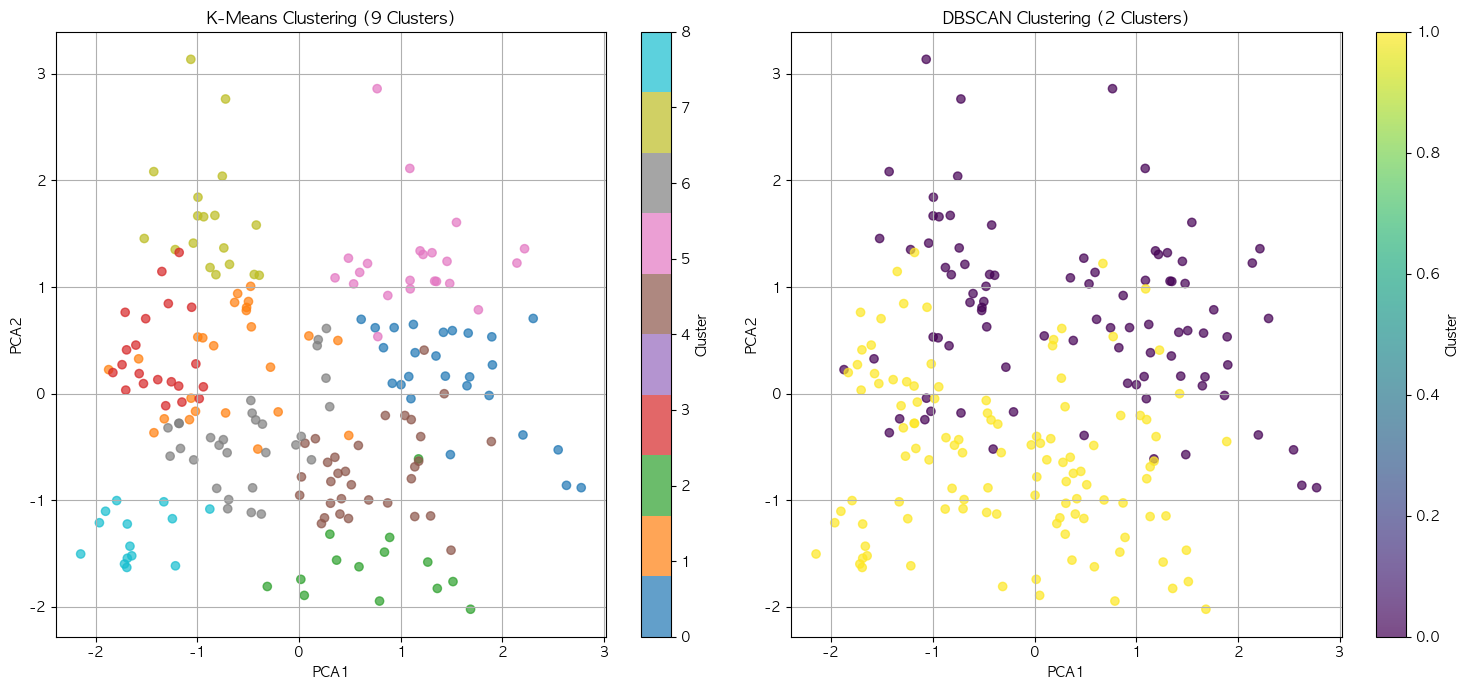

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster,Target
KMeans_Cluster,,,,,,,
0,71.653846,1.000000,58.846154,48.692308,39.846154,0.000000,1.0
1,56.083333,1.000000,25.250000,41.250000,60.916667,0.000000,0.0
2,22.857143,0.071429,41.214286,26.071429,20.142857,0.928571,0.0
3,163.333333,0.000000,32.190476,86.047619,81.666667,1.000000,0.0
4,97.812500,0.000000,53.312500,59.468750,42.437500,1.000000,0.0
5,165.545455,0.863636,39.272727,90.045455,15.045455,0.136364,0.0
6,108.310345,0.000000,29.310345,64.103448,43.448276,1.000000,0.0
7,160.444444,1.000000,33.277778,87.111111,82.666667,0.000000,0.0
8,24.285714,0.000000,25.857143,26.642857,79.142857,1.000000,0.0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Target
DBSCAN_Cluster,,,,,,,
0,104.238636,1.0,39.806818,62.227273,48.511364,2.806818,0.295455
1,97.562500,0.0,38.098214,59.250000,51.526786,4.625000,0.000000


(                CustomerID    Gender        Age  Annual Income (k$)  \
 KMeans_Cluster                                                        
 0                71.653846  1.000000  58.846154           48.692308   
 1                56.083333  1.000000  25.250000           41.250000   
 2                22.857143  0.071429  41.214286           26.071429   
 3               163.333333  0.000000  32.190476           86.047619   
 4                97.812500  0.000000  53.312500           59.468750   
 5               165.545455  0.863636  39.272727           90.045455   
 6               108.310345  0.000000  29.310345           64.103448   
 7               160.444444  1.000000  33.277778           87.111111   
 8                24.285714  0.000000  25.857143           26.642857   
 
                 Spending Score (1-100)  DBSCAN_Cluster  Target  
 KMeans_Cluster                                                  
 0                            39.846154        0.000000     1.0  
 1      

In [130]:
"""
:::::::::::::::::::::::::::::::::::이 아래는 OUTLINE일 뿐입니다.:::::::::::::::::::::::::::::::::::Í
"""
#K-Means with 9 Clusters
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)

#DBSCAN with 2 Clusters
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

#Visualize Clustering Results in 2D (PCA)
plt.figure(figsize=(15, 7))

#K-Means Visualization
plt.subplot(1, 2, 1)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans_labels, cmap='tab10', alpha=0.7)
plt.title('K-Means Clustering (9 Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.grid()

#DBSCAN Visualization
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (2 Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

#Analyze Cluster Characteristics
# Adding cluster labels to original data for both methods
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

#Analyze customer segmentation for K-Means
kmeans_analysis = data.groupby('KMeans_Cluster').mean()

#Analyze customer segmentation for DBSCAN (ignoring noise labeled as -1)
dbscan_analysis = data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

from IPython.display import display

#K-Means Cluster Analysis
display(kmeans_analysis)

#DBSCAN Cluster Analysis
display(dbscan_analysis)

kmeans_analysis, dbscan_analysis

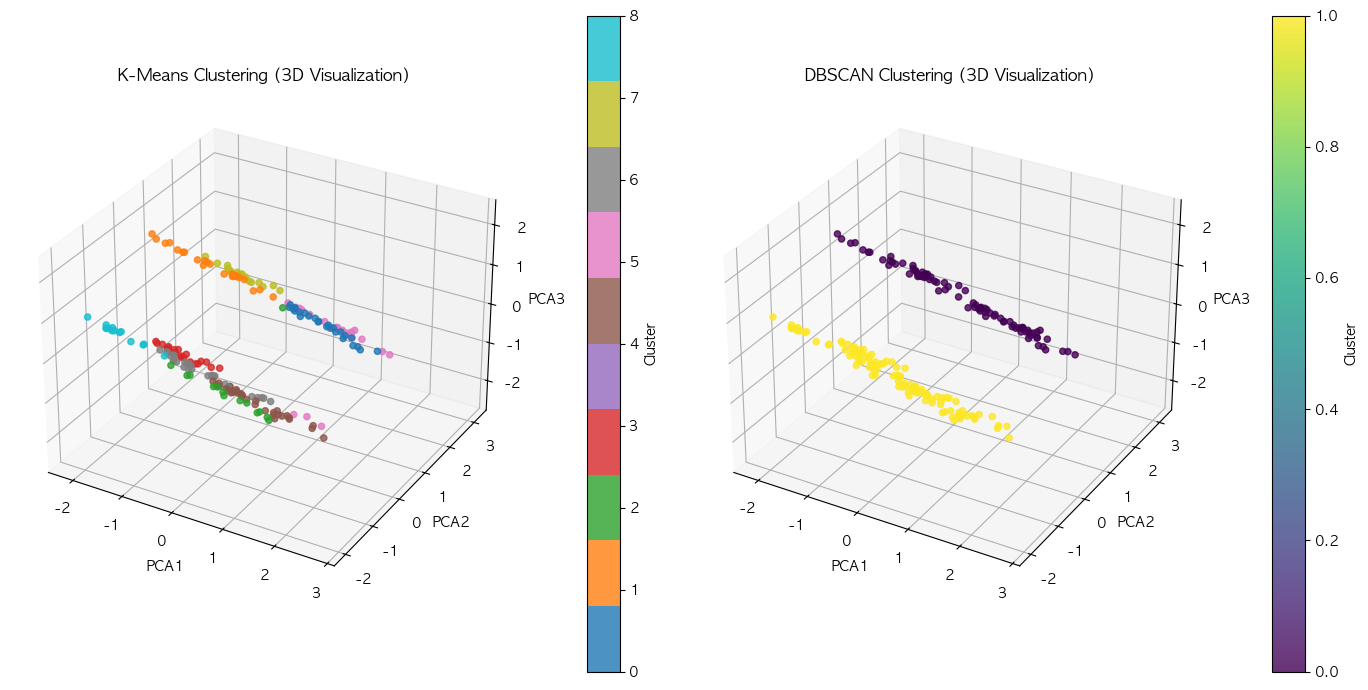

In [115]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(scaled_data)

pca_3d_df = pd.DataFrame(pca_3d_data, columns=['PCA1', 'PCA2', 'PCA3'])

#K-Means 3D Visualization
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'],
                c=kmeans_labels, cmap='tab10', alpha=0.8)
ax.set_title('K-Means Clustering (3D Visualization)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(sc, ax=ax, pad=0.1, label='Cluster')

#DBSCAN 3D Visualization
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'],
                  c=dbscan_labels, cmap='viridis', alpha=0.8)
ax2.set_title('DBSCAN Clustering (3D Visualization)')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
plt.colorbar(sc2, ax=ax2, pad=0.1, label='Cluster')

plt.tight_layout()
plt.show()

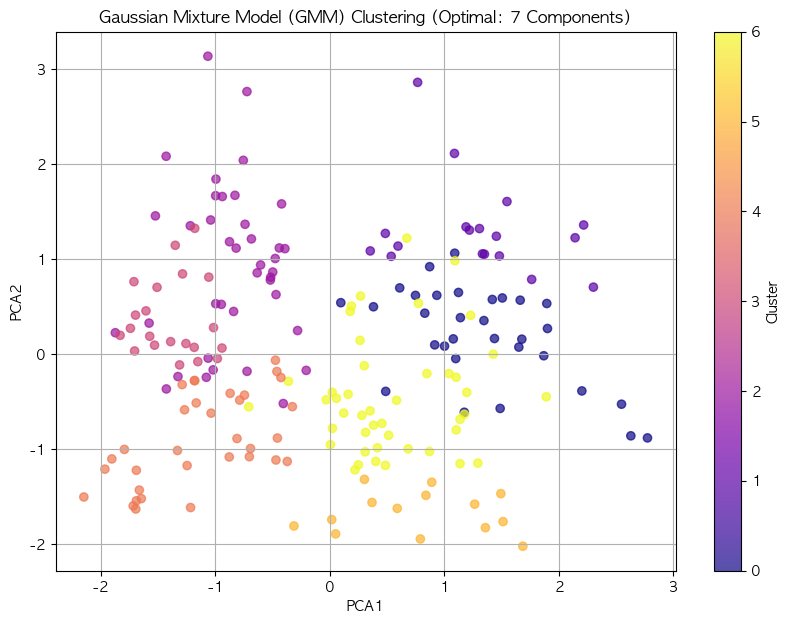

Clustering Method Performance Comparison
    Method  Silhouette Score
0  K-Means          0.334754
1   DBSCAN          0.277604
2      GMM          0.335074


,Method,Silhouette Score
0,K-Means,0.334754
1,DBSCAN,0.277604
2,GMM,0.335074


In [116]:
from sklearn.mixture import GaussianMixture

#Gaussian Mixture Model (GMM)
#Test GMM with 2 to 10 components
gmm_silhouette_scores = []
for n_components in range(2, 10):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm_labels = gmm.fit_predict(scaled_data)
    gmm_silhouette_scores.append(silhouette_score(scaled_data, gmm_labels))

#Best GMM Model
optimal_gmm_components = gmm_silhouette_scores.index(max(gmm_silhouette_scores)) + 2
gmm = GaussianMixture(n_components=optimal_gmm_components, random_state=0)
gmm_labels = gmm.fit_predict(scaled_data)

#Visualize GMM Results in 2D
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=gmm_labels, cmap='plasma', alpha=0.7)
plt.title(f'Gaussian Mixture Model (GMM) Clustering (Optimal: {optimal_gmm_components} Components)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

#Performance Comparison
#Compile silhouette scores for all methods
methods = ['K-Means', 'DBSCAN', 'GMM']
scores = {
    'K-Means': max(silhouette_scores),
    'DBSCAN': silhouette_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1,
    'GMM': max(gmm_silhouette_scores)
}

#Display performance comparison
scores_df = pd.DataFrame(list(scores.items()), columns=['Method', 'Silhouette Score'])
print("Clustering Method Performance Comparison")
print(scores_df)

scores_df

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

target_cluster = 0  
data['Target'] = (data['KMeans_Cluster'] == target_cluster).astype(int)

X = data.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'Target', 'CustomerID'])
y = data['Target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#Train a classification model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

#Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Target Cluster Prediction")
print(feature_importance)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0
Feature Importance for Target Cluster Prediction
                  Feature  Importance
1                     Age    0.440231
0                  Gender    0.298432
2      Annual Income (k$)    0.163463
3  Spending Score (1-100)    0.097874


# **CustomerID가 가입순서에 따라 부여 되었다고 가정**

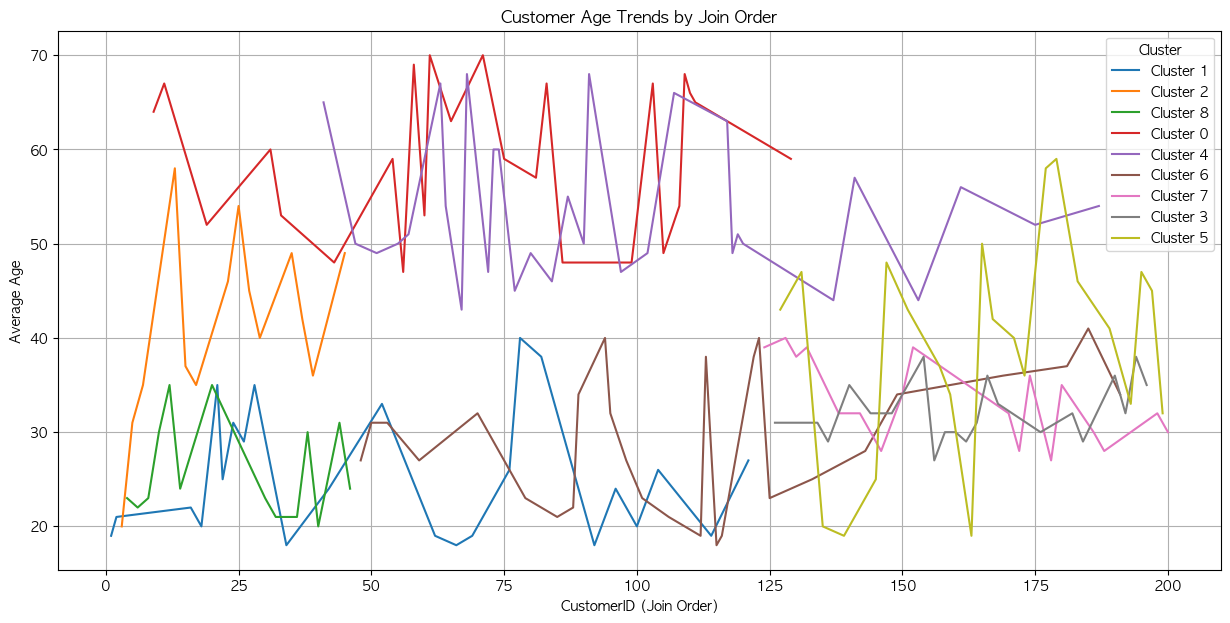

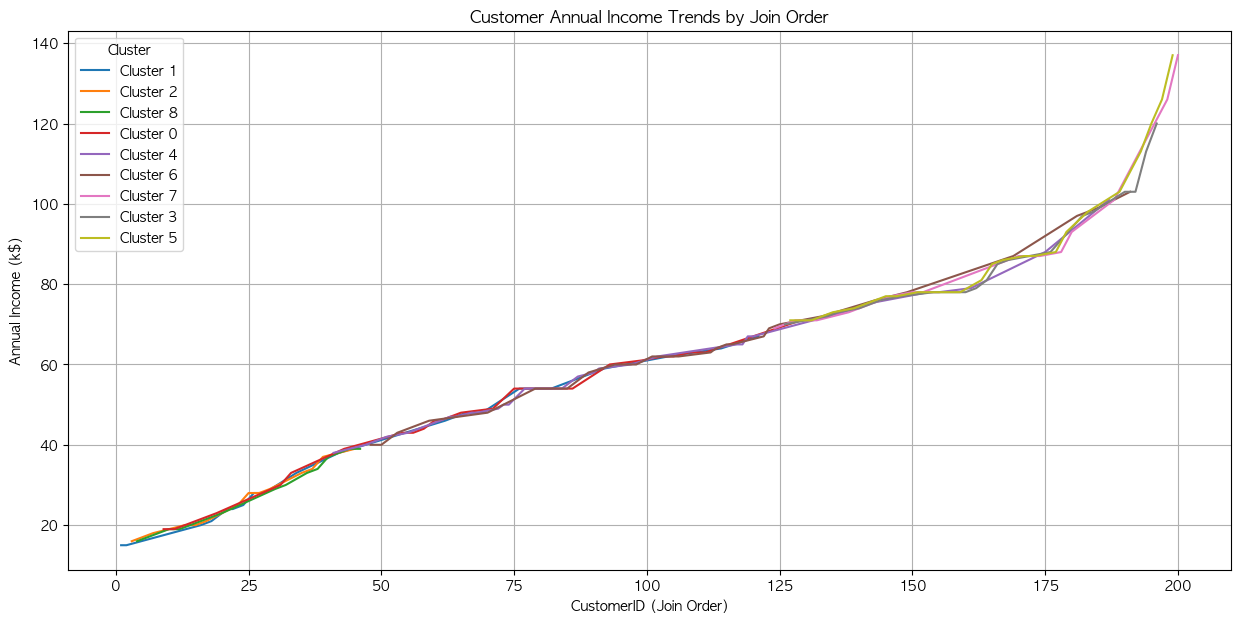

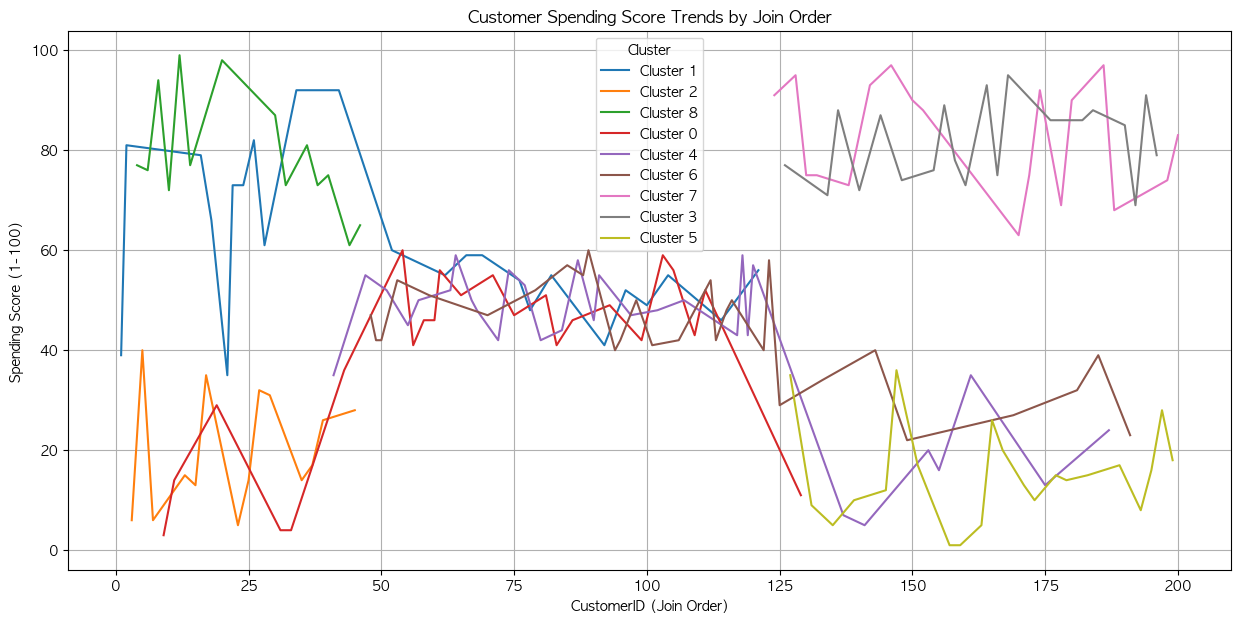

In [118]:
#Sort data by CustomerID (assumed as join order)
data = data.sort_values(by='CustomerID')

#Group data by clusters and calculate trends
time_series_data = data.groupby(['CustomerID', 'KMeans_Cluster']).mean().reset_index()

#Define a function for CustomerID-based trend visualization
def visualize_customer_trends(data, feature, ylabel, title):
    plt.figure(figsize=(15, 7))
    for cluster in data['KMeans_Cluster'].unique():
        cluster_data = data[data['KMeans_Cluster'] == cluster]
        plt.plot(cluster_data['CustomerID'], cluster_data[feature], label=f'Cluster {cluster}')
    plt.title(title)
    plt.xlabel('CustomerID (Join Order)')
    plt.ylabel(ylabel)
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

#Visualize trends for Age
visualize_customer_trends(
    time_series_data, 
    feature='Age', 
    ylabel='Average Age', 
    title='Customer Age Trends by Join Order'
)

#Visualize trends for Annual Income
visualize_customer_trends(
    time_series_data, 
    feature='Annual Income (k$)', 
    ylabel='Annual Income (k$)', 
    title='Customer Annual Income Trends by Join Order'
)

#Visualize trends for Spending Score
visualize_customer_trends(
    time_series_data, 
    feature='Spending Score (1-100)', 
    ylabel='Spending Score (1-100)', 
    title='Customer Spending Score Trends by Join Order'
)